# Creating a Preprocessing Pipeline

## Importing useful libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import set_config; set_config(display='diagram')

## Creating a base pipeline

### Creating the dataframes

In [2]:
df_train = pd.read_csv("gs://business-case/train.csv")
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [ ]:
df_train

<AxesSubplot:xlabel='store_nbr', ylabel='family'>

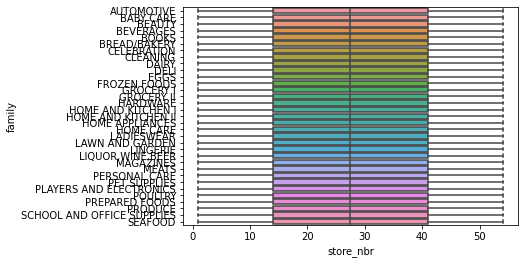

In [23]:
sns.boxplot(x= df_train["store_nbr"], y=df_train["family"])

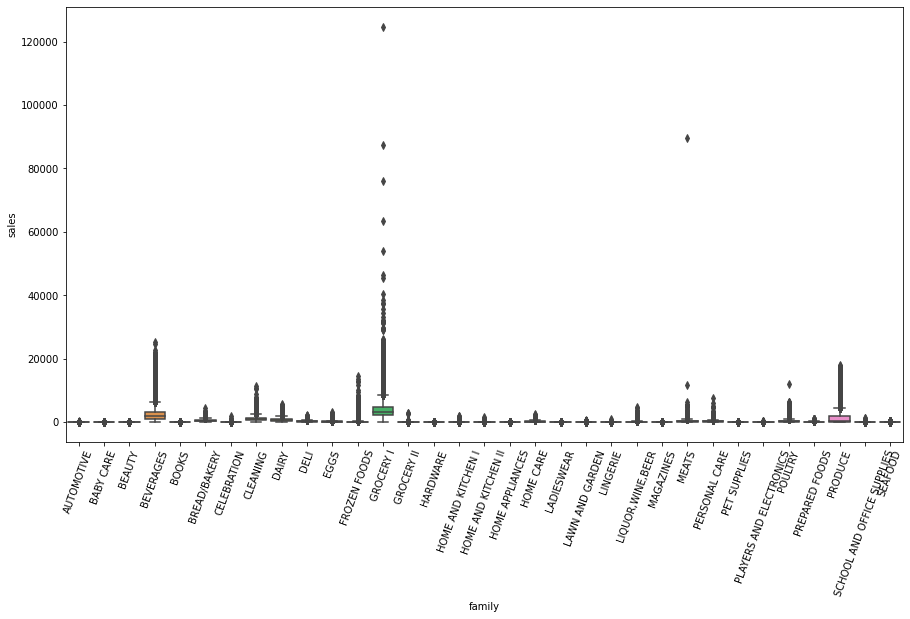

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x= df_train["family"], y=df_train["sales"])
locs, labels = plt.xticks()
plt.setp(labels, rotation=70);


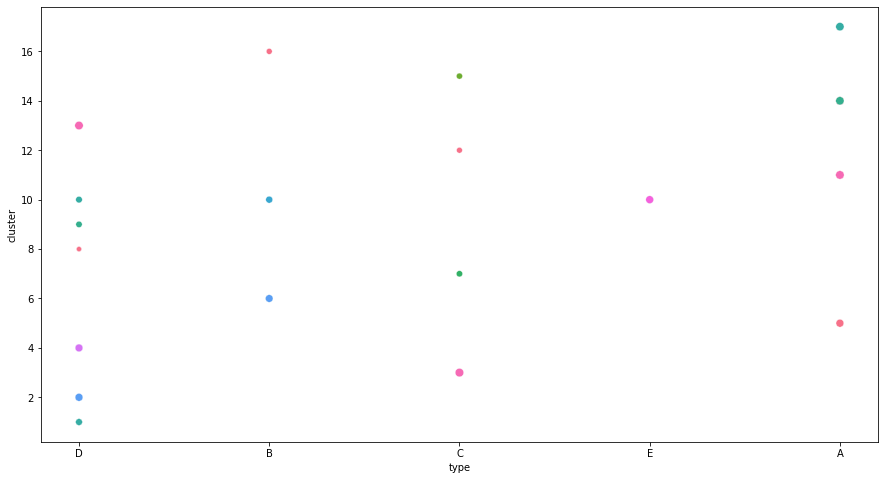

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_stores["type"], y= df_stores["cluster"], hue=df_stores["state"], size=df_stores["store_nbr"], legend=False );

In [11]:
df_stores = pd.read_csv("gs://business-case/stores.csv")
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [16]:
df_stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

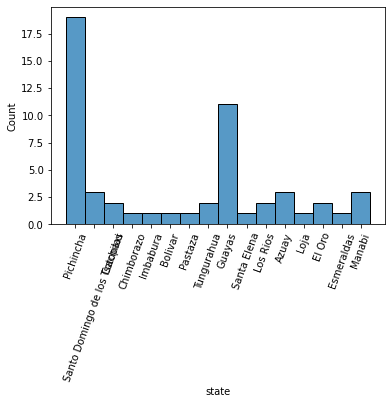

In [15]:
sns.histplot(df_stores["state"])
locs, labels = plt.xticks()
plt.setp(labels, rotation=70);

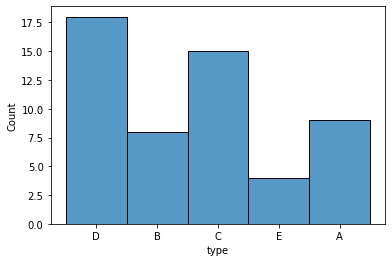

In [18]:
sns.histplot(df_stores["type"]);

In [ ]:
family = categorical
sales = number (robustscaller?)

### Preprocessing Pipeline

#### first the sales column

In [ ]:
# Preprocessing pipeline
pipe = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression() )
])